### Spotify Audio Features

1. **Danceability**: Suitability for dancing (0.0 to 1.0).
2. **Energy**: Intensity and activity (0.0 to 1.0).
3. **Key**: Musical key (0 to 11, with 0 = C, 1 = C♯/D♭, etc.).
4. **Loudness**: Overall loudness in decibels (dB, typically -60 to 0).
5. **Mode**: Modality (0 = minor, 1 = major).
6. **Speechiness**: Presence of spoken words (0.0 to 1.0).
7. **Acousticness**: Likelihood of being acoustic (0.0 to 1.0).
8. **Instrumentalness**: Likelihood of no vocals (0.0 to 1.0).
9. **Liveness**: Presence of an audience (0.0 to 1.0).
10. **Valence**: Musical positiveness (0.0 to 1.0).
11. **Tempo**: Speed in beats per minute (BPM).
12. **Duration_ms**: Duration in milliseconds.
13. **Time_signature**: Time signature (typically 3, 4, or 5).
14. **Id**: Spotify ID for the track.
15. **Uri**: Spotify URI for the track.
16. **Track_href**: Link to track details via Spotify API.
17. **Analysis_url**: URL for detailed audio analysis.


In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

In [5]:
# Load the dataset
file_path = 'Coldplay Research Project_Data.xlsx'
df = pd.read_excel(file_path, sheet_name=None)
df = df['Sheet1']

In [7]:
df.head()

,#,Album Number,Album Name,Album Release Date,Track Number,Track Name,Lyrics
0,1,1,Parachutes,2000,1,Don't Panic,"Bones, sinking like stones\nAll that we fought..."
1,2,1,Parachutes,2000,2,Shiver,So I look in your direction\nBut you pay me no...
2,3,1,Parachutes,2000,3,Spies,"I awake to find no peace of mind\nI said, ""How..."
3,4,1,Parachutes,2000,4,Sparks,Did I drive you away?\nI know what you'll say\...
4,5,1,Parachutes,2000,5,Yellow,Look at the stars\nLook how they shine for you...


In [8]:

client_id = ''
client_secret = ''

In [9]:
# Authenticate with Spotify
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

In [16]:
# Function to get album ID from album name
def get_album_id(album_name, artist_name="Coldplay"):
    try:
        result = sp.search(q=f"album:{album_name} artist:{artist_name}", type='album')
        if result['albums']['items']:
            album_id = result['albums']['items'][0]['id']
            return album_id
        else:
            print(f"No results found for album {album_name}")
            return None
    except Exception as e:
        print(f"Error fetching album ID for {album_name}: {e}")
        return None

## Explore the spotify api

In [20]:
#get Parachutes id and append it to a test list.
parachute_id = get_album_id('Parachutes')
test_list = []
test_list.append(parachute_id)
test_list

['6ZG5lRT77aJ3btmArcykra']

In [23]:
parachute_tracks = sp.album_tracks(parachute_id)


{'href': 'https://api.spotify.com/v1/albums/6ZG5lRT77aJ3btmArcykra/tracks?offset=0&limit=50',
 'items': [{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4gzpq5DPGxSnKTe4SA8HAU'},
     'href': 'https://api.spotify.com/v1/artists/4gzpq5DPGxSnKTe4SA8HAU',
     'id': '4gzpq5DPGxSnKTe4SA8HAU',
     'name': 'Coldplay',
     'type': 'artist',
     'uri': 'spotify:artist:4gzpq5DPGxSnKTe4SA8HAU'}],
   'available_markets': ['AR',
    'AU',
    'AT',
    'BE',
    'BO',
    'BR',
    'BG',
    'CA',
    'CL',
    'CO',
    'CR',
    'CY',
    'CZ',
    'DK',
    'DO',
    'DE',
    'EC',
    'EE',
    'SV',
    'FI',
    'FR',
    'GR',
    'GT',
    'HN',
    'HK',
    'HU',
    'IS',
    'IE',
    'IT',
    'LV',
    'LT',
    'LU',
    'MY',
    'MT',
    'MX',
    'NL',
    'NZ',
    'NI',
    'NO',
    'PA',
    'PY',
    'PE',
    'PH',
    'PL',
    'PT',
    'SG',
    'SK',
    'ES',
    'SE',
    'CH',
    'TW',
    'TR',
    'UY',
    'US',
    'GB',
    'AD'

In [21]:
#create a list of unique albums
cp_albums= df['Album Name'].unique()
len(cp_albums)

9

In [22]:
#get a list of all album ids
cp_albums_id = []
for album in cp_albums:
    id = get_album_id(album)
    cp_albums_id.append(id)
    
cp_albums_id

['6ZG5lRT77aJ3btmArcykra',
 '0RHX9XECH8IVI3LNgWDpmQ',
 '4E7bV0pzG0LciBSWTszra6',
 '1CEODgTmTwLyabvwd7HBty',
 '2R7iJz5uaHjLEVnMkloO18',
 '2G4AUqfwxcV1UdQjm2ouYr',
 '3cfAM8b8KqJRoIzt3zLKqw',
 '2FeyIYDDAQqcOJKOKhvHdr',
 '06mXfvDsRZNfnsGZvX2zpb']

In [25]:
parachute_tracks.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [31]:
parachute_tracks_ids = [(track['name'],track['id']) for track in parachute_tracks['items']]
parachute_tracks_ids

[("Don't Panic", '2QhURnm7mQDxBb5jWkbDug'),
 ('Shiver', '0qksx8mV28lztYIZ1om8ml'),
 ('Spies', '2mLgOcRkEgq89j8WstUpui'),
 ('Sparks', '7D0RhFcb3CrfPuTJ0obrod'),
 ('Yellow', '3AJwUDP919kvQ9QcozQPxg'),
 ('Trouble', '0R8P9KfGJCDULmlEoBagcO'),
 ('Parachutes', '4qzoHxgp42ylb18ga1SWTL'),
 ('High Speed', '2DHgvPQD1jApRnT1DBZdrS'),
 ('We Never Change', '5TB6QgrF0RPIxSCGfRDLoe'),
 ("Everything's Not Lost - Includes Hidden Track 'Life Is For Living'",
  '1RNtm45kw0hPMBz7gKiIYu')]

In [32]:
spies_features = sp.audio_features('2mLgOcRkEgq89j8WstUpui')

In [39]:
audio_features = list(spies_features[0].keys())
audio_features

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature']

In [ ]:
# Function to get track IDs from album ID
def get_track_ids(album_id):
    try:
        tracks = sp.album_tracks(album_id)
        track_ids = [track['id'] for track in tracks['items']]
        return track_ids
    except Exception as e:
        print(f"Error fetching tracks for album ID {album_id}: {e}")
        return []

## Add audio features to dataset

In [57]:

# Function to get album ID from album name
def get_album_id(album_name, artist_name="Coldplay"):
    try:
        result = sp.search(q=f"album:{album_name} artist:{artist_name}", type='album')
        if result['albums']['items']:
            album_id = result['albums']['items'][0]['id']
            return album_id
        else:
            print(f"No results found for album {album_name}")
            return None
    except Exception as e:
        print(f"Error fetching album ID for {album_name}: {e}")
        return None

# Function to get tracks from album ID
def get_tracks(album_id, album_name):
    try:
        tracks = sp.album_tracks(album_id)
        track_info = [{'track_id': track['id'], 'track_name': track['name'], 'album_name': album_name, 'album_id': album_id} for track in tracks['items']]
        return track_info
    except Exception as e:
        print(f"Error fetching tracks for album ID {album_id}: {e}")
        return []

# Function to get audio features from track IDs
def get_audio_features(track_info):
    try:
        track_ids = [track['track_id'] for track in track_info]
        audio_features = sp.audio_features(tracks=track_ids)
        for i, features in enumerate(audio_features):
            if features:
                track_info[i].update(features)
        return track_info
    except Exception as e:
        print(f"Error fetching audio features: {e}")
        return []

# Adding audio features to the DataFrame
def add_audio_features(df):
    track_info_list = []
    for album_name in df['Album Name'].unique():
        album_id = get_album_id(album_name)
        if album_id:
            track_info = get_tracks(album_id, album_name)
            enriched_track_info = get_audio_features(track_info)
            track_info_list.extend(enriched_track_info)
    
    audio_features_df = pd.DataFrame(track_info_list)
    return audio_features_df

# Apply the function to add audio features
audio_features_df = add_audio_features(df)

In [58]:
audio_features_df.head()

,track_id,track_name,album_name,album_id,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,2QhURnm7mQDxBb5jWkbDug,Don't Panic,Parachutes,6ZG5lRT77aJ3btmArcykra,0.602,0.612,0,-8.409,1,0.0335,...,0.1070,0.4530,122.062,audio_features,2QhURnm7mQDxBb5jWkbDug,spotify:track:2QhURnm7mQDxBb5jWkbDug,https://api.spotify.com/v1/tracks/2QhURnm7mQDx...,https://api.spotify.com/v1/audio-analysis/2QhU...,136867,4
1,0qksx8mV28lztYIZ1om8ml,Shiver,Parachutes,6ZG5lRT77aJ3btmArcykra,0.396,0.803,4,-6.186,1,0.0487,...,0.0688,0.2860,116.705,audio_features,0qksx8mV28lztYIZ1om8ml,spotify:track:0qksx8mV28lztYIZ1om8ml,https://api.spotify.com/v1/tracks/0qksx8mV28lz...,https://api.spotify.com/v1/audio-analysis/0qks...,304200,3
2,2mLgOcRkEgq89j8WstUpui,Spies,Parachutes,6ZG5lRT77aJ3btmArcykra,0.309,0.673,1,-5.524,0,0.0319,...,0.0635,0.0732,147.599,audio_features,2mLgOcRkEgq89j8WstUpui,spotify:track:2mLgOcRkEgq89j8WstUpui,https://api.spotify.com/v1/tracks/2mLgOcRkEgq8...,https://api.spotify.com/v1/audio-analysis/2mLg...,318773,4
3,7D0RhFcb3CrfPuTJ0obrod,Sparks,Parachutes,6ZG5lRT77aJ3btmArcykra,0.371,0.268,1,-10.506,1,0.0281,...,0.1040,0.1650,102.617,audio_features,7D0RhFcb3CrfPuTJ0obrod,spotify:track:7D0RhFcb3CrfPuTJ0obrod,https://api.spotify.com/v1/tracks/7D0RhFcb3Crf...,https://api.spotify.com/v1/audio-analysis/7D0R...,227093,3
4,3AJwUDP919kvQ9QcozQPxg,Yellow,Parachutes,6ZG5lRT77aJ3btmArcykra,0.429,0.661,11,-7.227,1,0.0281,...,0.2340,0.2850,173.372,audio_features,3AJwUDP919kvQ9QcozQPxg,spotify:track:3AJwUDP919kvQ9QcozQPxg,https://api.spotify.com/v1/tracks/3AJwUDP919kv...,https://api.spotify.com/v1/audio-analysis/3AJw...,266773,4


In [60]:
audio_features_df.shape

(106, 22)

In [61]:
audio_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          106 non-null    object 
 1   track_name        106 non-null    object 
 2   album_name        106 non-null    object 
 3   album_id          106 non-null    object 
 4   danceability      106 non-null    float64
 5   energy            106 non-null    float64
 6   key               106 non-null    int64  
 7   loudness          106 non-null    float64
 8   mode              106 non-null    int64  
 9   speechiness       106 non-null    float64
 10  acousticness      106 non-null    float64
 11  instrumentalness  106 non-null    float64
 12  liveness          106 non-null    float64
 13  valence           106 non-null    float64
 14  tempo             106 non-null    float64
 15  type              106 non-null    object 
 16  id                106 non-null    object 
 1

In [63]:
# Save the audio features DataFrame to a new Excel file
output_file_path = 'data/spotify_audio_features.xlsx'
audio_features_df.to_excel(output_file_path, index=False)

In [77]:
df.tail(10)

,#,Album Number,Album Name,Album Release Date,Track Number,Track Name,Lyrics,matches,best_match
96,97,9,Music of the Spheres,2021,3,Humankind,Today I heard the strangest\nI heard the stran...,"[(Humankind, 100.0, 96)]",Humankind
97,98,9,Music of the Spheres,2021,4,Alien Choir,! (This song is an instrumental).,"[(A Whisper, 50.0, 18)]",None
98,99,9,Music of the Spheres,2021,5,Let Somebody Go (with Selena Gomez),"(Let somebody, let somebody go)\nWe've had tha...","[(Let Somebody Go, 60.0, 98)]",None
99,100,9,Music of the Spheres,2021,6,Human Heart (with We Are King & Jacob Collier),Boys\nBoys don't cry\nBoys keep it all inside\...,"[(A Head Full of Dreams, 35.820895522388064, 67)]",None
100,101,9,Music of the Spheres,2021,7,People of the Pride,People on the left\nPeople on the right\nGot a...,"[(People of The Pride, 78.94736842105263, 100)]",None
101,102,9,Music of the Spheres,2021,8,Biutyful,All I know is\nI love you so\n♪\nI hope that y...,"[(Biutyful, 100.0, 101)]",Biutyful
102,103,9,Music of the Spheres,2021,9,Music of the Spheres II,Ladies and gentlemen\nWelcome to\nMusic\nOf th...,"[(Speed of Sound, 48.64864864864865, 27)]",None
103,104,9,Music of the Spheres,2021,10,My Universe (with BTS),"You (you), you are (you are) my universe\nAnd ...","[(My Universe, 66.66666666666667, 103)]",None
104,105,9,Music of the Spheres,2021,11,Infinity Sign,"Olé, olé, olé, olé, olé, olé\nOlé, olé, olé, o...","[(Strawberry Swing, 41.379310344827594, 42)]",None
105,106,9,Music of the Spheres,2021,12,Coloratura,Coloratura\nWe fell in through the clouds\nAnd...,"[(Coloratura, 100.0, 105)]",Coloratura


In [76]:
audio_features_df.tail(10)

,track_id,track_name,album_name,album_id,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
96,23BO6YozrAXUta1buxFZ80,Humankind,Music of the Spheres,06mXfvDsRZNfnsGZvX2zpb,0.5750,0.8380,2,-6.498,1,0.0454,...,0.4580,0.2150,135.006,audio_features,23BO6YozrAXUta1buxFZ80,spotify:track:23BO6YozrAXUta1buxFZ80,https://api.spotify.com/v1/tracks/23BO6YozrAXU...,https://api.spotify.com/v1/audio-analysis/23BO...,266705,4
97,1danObd53GynoY83wRz3Ua,✨,Music of the Spheres,06mXfvDsRZNfnsGZvX2zpb,0.0859,0.2890,5,-17.240,0,0.0359,...,0.1410,0.0380,166.784,audio_features,1danObd53GynoY83wRz3Ua,spotify:track:1danObd53GynoY83wRz3Ua,https://api.spotify.com/v1/tracks/1danObd53Gyn...,https://api.spotify.com/v1/audio-analysis/1dan...,53033,4
98,4cGqn0E8JCSY9gQllQj4Mf,Let Somebody Go,Music of the Spheres,06mXfvDsRZNfnsGZvX2zpb,0.5920,0.3420,0,-8.930,1,0.0339,...,0.1100,0.1550,130.953,audio_features,4cGqn0E8JCSY9gQllQj4Mf,spotify:track:4cGqn0E8JCSY9gQllQj4Mf,https://api.spotify.com/v1/tracks/4cGqn0E8JCSY...,https://api.spotify.com/v1/audio-analysis/4cGq...,241595,4
99,3oTYv0yShT4sjuPncoUXfK,❤️,Music of the Spheres,06mXfvDsRZNfnsGZvX2zpb,0.3480,0.0491,4,-15.431,1,0.0404,...,0.0918,0.2320,136.680,audio_features,3oTYv0yShT4sjuPncoUXfK,spotify:track:3oTYv0yShT4sjuPncoUXfK,https://api.spotify.com/v1/tracks/3oTYv0yShT4s...,https://api.spotify.com/v1/audio-analysis/3oTY...,188967,1
100,5ophZLHA9mwSZhQSmboyDN,People of The Pride,Music of the Spheres,06mXfvDsRZNfnsGZvX2zpb,0.4320,0.6130,4,-6.785,0,0.0349,...,0.3120,0.0911,136.362,audio_features,5ophZLHA9mwSZhQSmboyDN,spotify:track:5ophZLHA9mwSZhQSmboyDN,https://api.spotify.com/v1/tracks/5ophZLHA9mwS...,https://api.spotify.com/v1/audio-analysis/5oph...,217267,4
101,2L2mM3rEO3arNIMQnb3dou,Biutyful,Music of the Spheres,06mXfvDsRZNfnsGZvX2zpb,0.6140,0.6800,5,-7.840,0,0.0425,...,0.1180,0.3470,153.937,audio_features,2L2mM3rEO3arNIMQnb3dou,spotify:track:2L2mM3rEO3arNIMQnb3dou,https://api.spotify.com/v1/tracks/2L2mM3rEO3ar...,https://api.spotify.com/v1/audio-analysis/2L2m...,192395,4
102,0RbekAlUrwR6ZWJdwB3V4y,🌎,Music of the Spheres,06mXfvDsRZNfnsGZvX2zpb,0.1150,0.9070,3,-20.358,1,0.2230,...,0.9800,0.0185,189.885,audio_features,0RbekAlUrwR6ZWJdwB3V4y,spotify:track:0RbekAlUrwR6ZWJdwB3V4y,https://api.spotify.com/v1/tracks/0RbekAlUrwR6...,https://api.spotify.com/v1/audio-analysis/0Rbe...,21388,3
103,46HNZY1i7O6jwTA7Slo2PI,My Universe,Music of the Spheres,06mXfvDsRZNfnsGZvX2zpb,0.5730,0.7110,1,-6.268,0,0.0406,...,0.3280,0.4700,105.006,audio_features,46HNZY1i7O6jwTA7Slo2PI,spotify:track:46HNZY1i7O6jwTA7Slo2PI,https://api.spotify.com/v1/tracks/46HNZY1i7O6j...,https://api.spotify.com/v1/audio-analysis/46HN...,226198,4
104,2wleRXcIPqltoDPLMH5WDa,♾,Music of the Spheres,06mXfvDsRZNfnsGZvX2zpb,0.5760,0.8960,2,-8.994,1,0.0412,...,0.1530,0.4120,135.010,audio_features,2wleRXcIPqltoDPLMH5WDa,spotify:track:2wleRXcIPqltoDPLMH5WDa,https://api.spotify.com/v1/tracks/2wleRXcIPqlt...,https://api.spotify.com/v1/audio-analysis/2wle...,226141,4
105,0jH7gF7KCk2Lom9gimaKms,Coloratura,Music of the Spheres,06mXfvDsRZNfnsGZvX2zpb,0.2850,0.2650,2,-10.836,1,0.0288,...,0.0660,0.0699,134.055,audio_features,0jH7gF7KCk2Lom9gimaKms,spotify:track:0jH7gF7KCk2Lom9gimaKms,https://api.spotify.com/v1/tracks/0jH7gF7KCk2L...,https://api.spotify.com/v1/audio-analysis/0jH7...,617057,4


## Visualizations

array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'duration_ms'}>],
       [<Axes: title={'center': 'time_signature'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

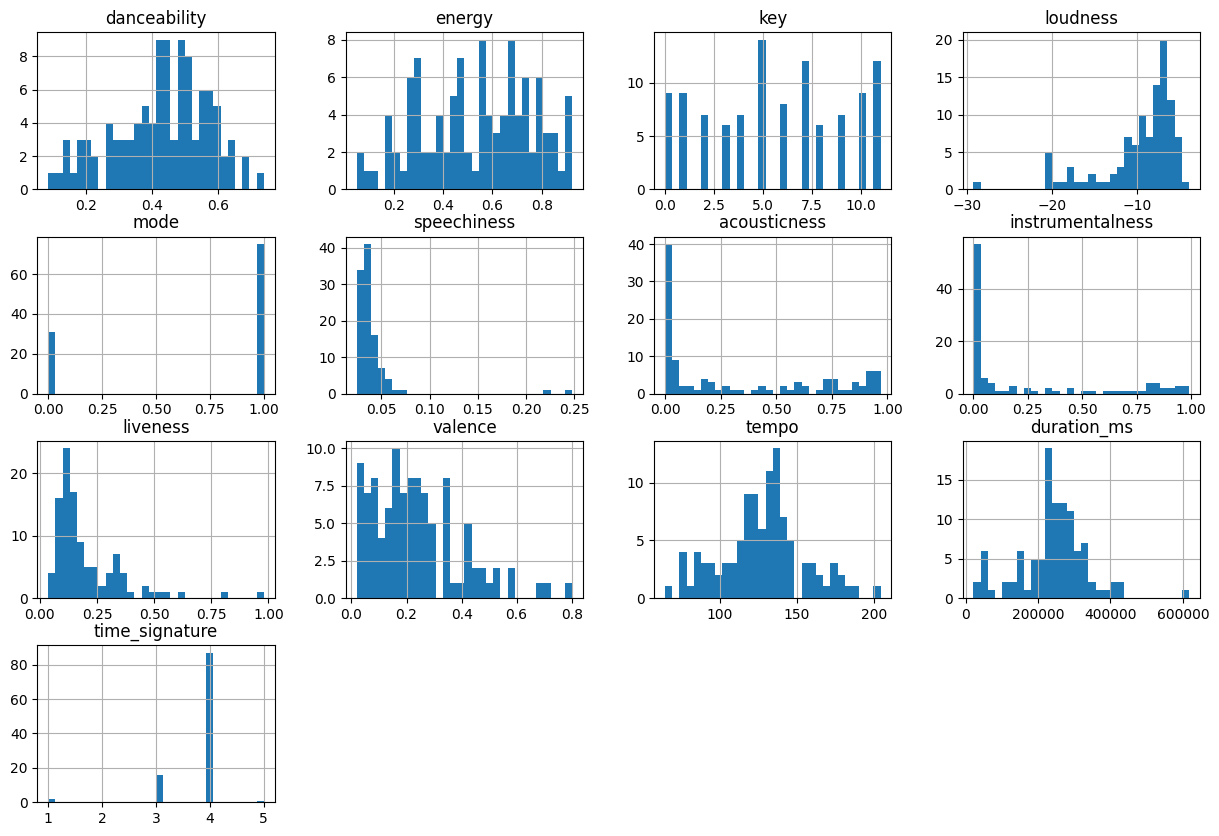

In [78]:
audio_features_df.hist(bins=30, figsize=(15, 10))


In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 1200x800 with 0 Axes>

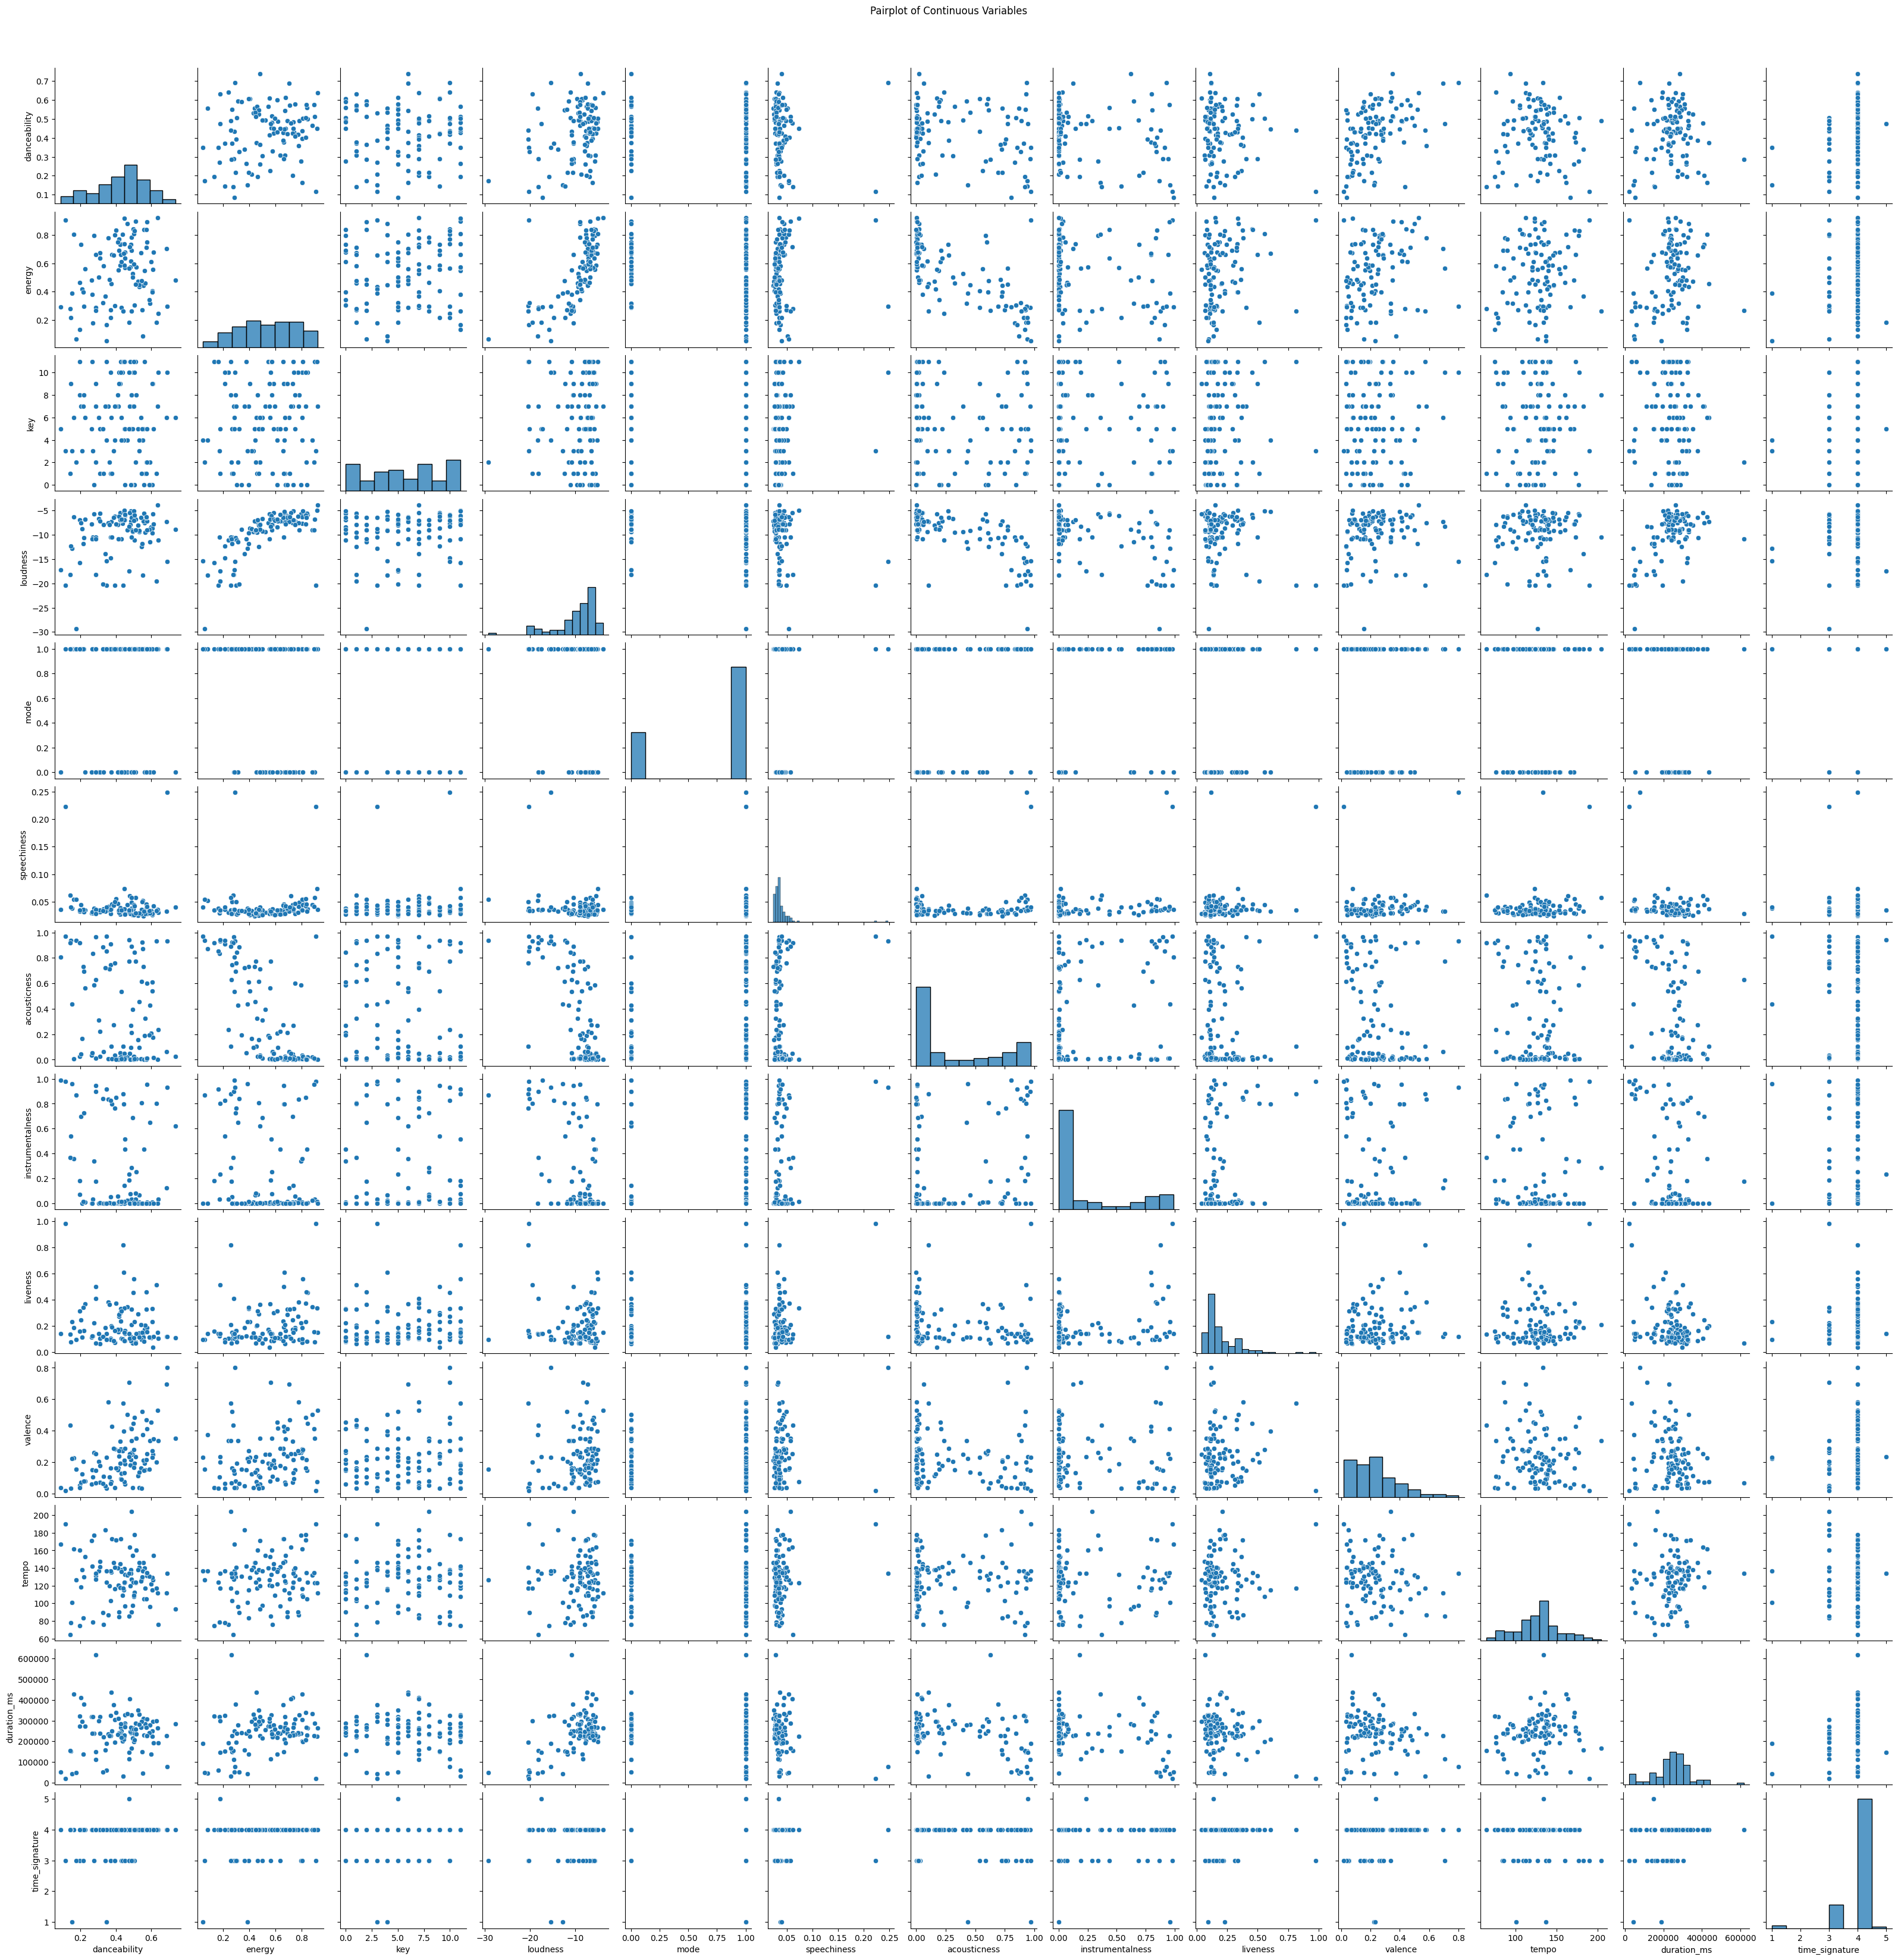

In [81]:
# Create a pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(audio_features_df)
plt.suptitle('Pairplot of Continuous Variables', y=1.02)
plt.show()

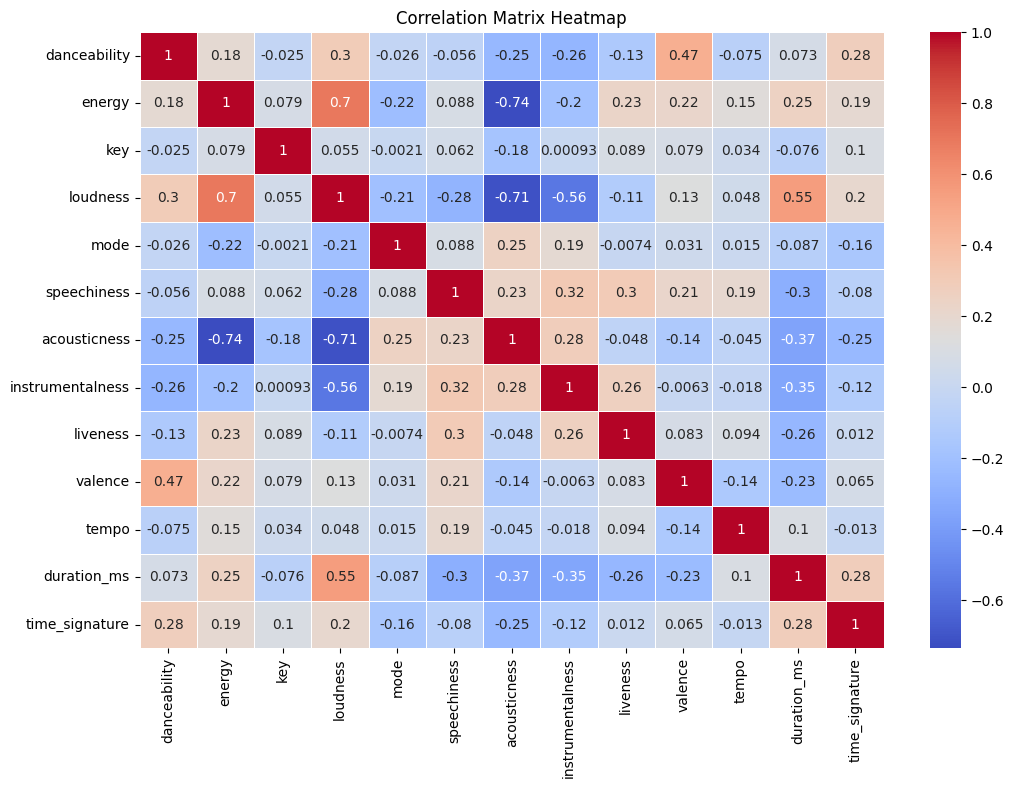

In [83]:
# Select only numerical columns
numerical_cols = audio_features_df.select_dtypes(include='number').columns
numerical_df = audio_features_df[numerical_cols]

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()